##Importing Libraries

In [1]:
import pandas as pd
import numpy as np

In [2]:
wine_dataset=pd.read_csv('/content/drive/MyDrive/winequality-red.csv')

In [3]:
wine_dataset.shape

(1599, 12)

In [4]:
wine_dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
wine_dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [7]:
wine_dataset.isnull().sum().sum()#no missing values

0

##Data Visualization

In [8]:
import seaborn as sns

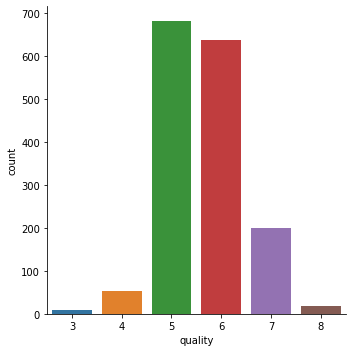

In [9]:
#number of wines with good qaulity---> 7,8 are good qaulity wines but see they are less in number as compared 5,6 whcih is fair qaulity
sns.catplot(x='quality', data=wine_dataset, kind='count')

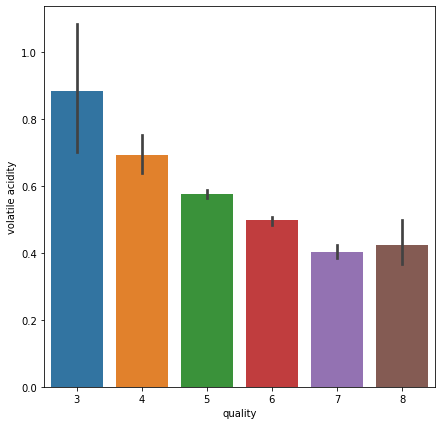

In [14]:
#voliatile acidity vs quality
import matplotlib.pyplot as plt
plot=plt.figure(figsize=(7,7))
sns.barplot(x='quality' , y='volatile acidity', data=wine_dataset)
#see the graph it shows if volatile acidity is high less quality of the wine is and vice versa

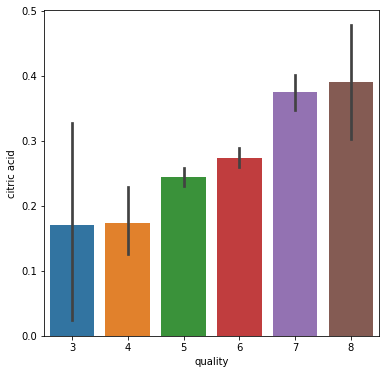

In [15]:
#citric acid vs quality
plot=plt.figure(figsize=(6,6))
sns.barplot(x='quality', y='citric acid', data=wine_dataset)
#More citric acid means more good quality of wine

##Correlation: 
####1.Positive Correlation (one value increase thus the other also increases)
####2.Negative Correlation (one value decrease the other also decreases )


### we need to find correlation of all columns to the quality column

In [16]:
correlation=wine_dataset.corr()

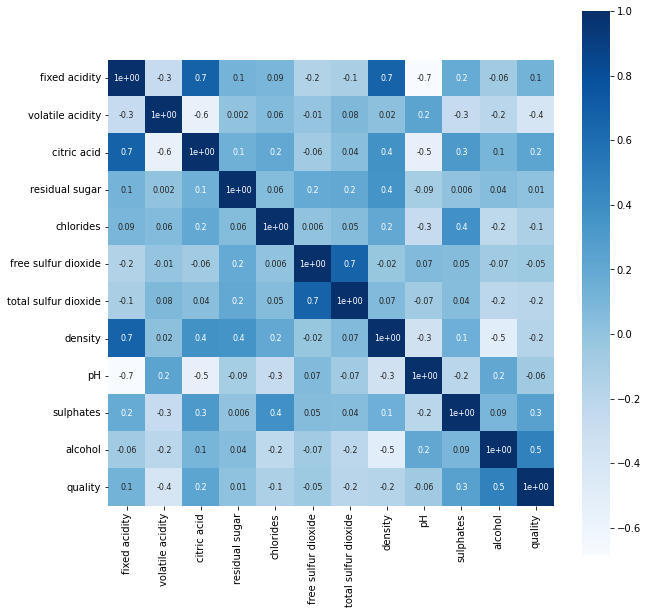

In [19]:
plot=plt.figure(figsize=(10,10))
sns.heatmap(correlation , cbar=True , square=True, fmt='.1', annot=True , annot_kws={'size':8}, cmap='Blues')
#Darker the colot means more close relation with the quality of wine 
#Ignore the diagonal it is not significant the main thing is the above triangle (+ve correlation ) amd lower triangle (-ve correlation)

#Y label Binarization and splitting dependent and independent variables

In [20]:
X=wine_dataset.drop(columns='quality', axis=1)

In [21]:
print(X)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

In [22]:
# important we consider that wine value more then 7 or eqaul to 7 is good quality so we need to convert into binary 1 for good quality and 0 for bad
# below 7 wine quality is considered bad and <=7 means good quality
y=wine_dataset['quality'].apply(lambda value_of_y:1 if value_of_y >=7 else 0 )

In [23]:
print(y)

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64


##Train_Test_split

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train , X_test, y_train , y_test =train_test_split(X, y , test_size=0.2 , random_state=51)

In [26]:
print(X_train.shape, X_test.shape,y_train.shape, y_test.shape)

(1279, 11) (320, 11) (1279,) (320,)


#Model Building ---> Random forest

In [28]:
from sklearn.ensemble import RandomForestClassifier


In [29]:
Random_forest_model=RandomForestClassifier()

In [30]:
Random_forest_model.fit(X_train , y_train)

RandomForestClassifier()

In [31]:
Random_forest_model.score(X_test, y_test)

0.94375

##Prediction System

In [36]:
input_data=(7.3,0.65,0.0,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0)

prediction=Random_forest_model.predict([input_data])


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [37]:
print(prediction)

[1]


In [38]:
if prediction[0]==0: 
  print("Bad Quality Wine")
else:
  print("Good Quality Wine")

Good Quality Wine


#Saving Model and predicting

In [39]:
import pickle

In [42]:
pickle.dump(Random_forest_model,open('Wine_model_prediction', 'wb'))

In [44]:
model_prediction=pickle.load(open('Wine_model_prediction', 'rb'))

In [49]:
input_data=(7.9,0.32,0.51,1.8,0.341,17.0,56.0,0.9969,3.04,1.08,9.2)
prediction=model_prediction.predict([input_data]) #note use .predict with the model name always for predictions

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [50]:
if prediction[0]==0: 
  print("Bad Quality Wine")
else:
  print("Good Quality Wine")

Bad Quality Wine


#END